# Analysis of Content Similarity for Mindtools Top-level Skills

Questions to answer:
- how does the distribution of similarity scores look like, per skill, per provider?
- are the best ranked results per skill actually good results?

## Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

Source:
- https://djeeny.slack.com/archives/C03H2U60TBQ/p1661266257388829
- https://djeeny.slack.com/files/U02EKSHU69L/F03UT02C6RH/mindtools_content_similarity_pruned.xlsx

In [2]:
df = pd.read_excel('./data/mindtools_content_similarity_pruned.xlsx')

skills_df = df.drop(columns=['title', 'uuid', 'url', 'provider'])

## Data Analysis

### Basic Statistics

medium      8140
hbr         2932
vodafone       2
Name: provider, dtype: int64


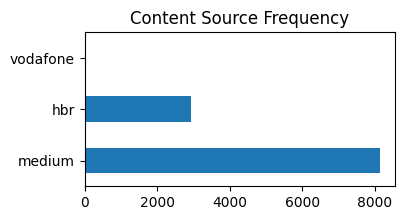

In [3]:
print(df.provider.value_counts())
df.provider.value_counts().plot.barh(title="Content Source Frequency", figsize=(4,2));

### Similarity Score Distribution

trying to reproduce https://djeeny.slack.com/archives/C03H2U60TBQ/p1660904788086569

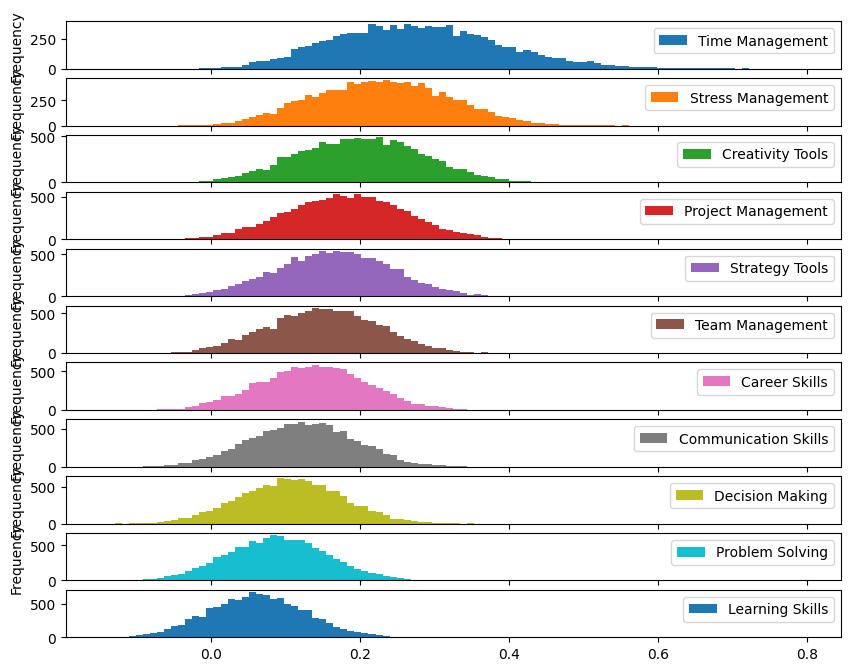

In [4]:
skills_df.plot.hist(subplots=True, bins=100, figsize=(10, 8));
plt.ylabel(None);

In [5]:
skills_df.min()

Time Management        -0.020439
Stress Management      -0.039942
Creativity Tools       -0.052008
Project Management     -0.063058
Strategy Tools         -0.078544
Team Management        -0.082550
Career Skills          -0.087792
Communication Skills   -0.108239
Decision Making        -0.124726
Problem Solving        -0.139048
Learning Skills        -0.148563
dtype: float64

In [6]:
skills_df.max()

Time Management         0.797905
Stress Management       0.559629
Creativity Tools        0.510480
Project Management      0.491315
Strategy Tools          0.414820
Team Management         0.384550
Career Skills           0.364600
Communication Skills    0.350852
Decision Making         0.348520
Problem Solving         0.325703
Learning Skills         0.317236
dtype: float64

In [7]:
skills_df.mean()

Time Management         0.277587
Stress Management       0.227942
Creativity Tools        0.200399
Project Management      0.180580
Strategy Tools          0.164766
Team Management         0.150520
Career Skills           0.136580
Communication Skills    0.122616
Decision Making         0.107258
Problem Solving         0.088796
Learning Skills         0.061606
dtype: float64

### Distribution per Provider

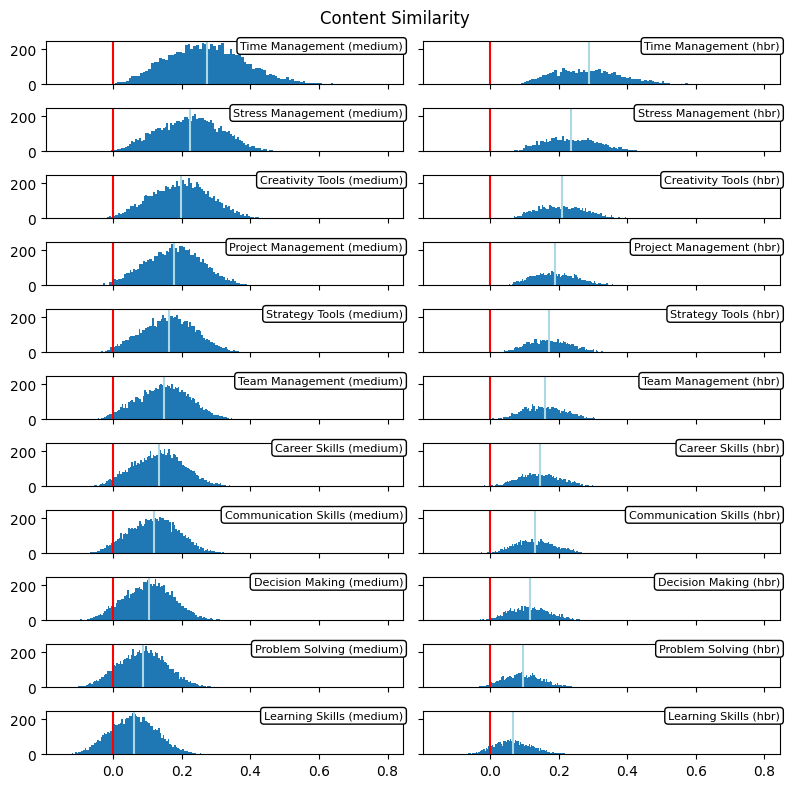

In [8]:
fig, axs = plt.subplots(len(skills_df.columns), 2, figsize=(8,8), sharex=True, sharey=True)
for i, provider in enumerate(['medium', 'hbr']):
    _df = df[lambda x: x.provider == provider].drop(columns=['provider'])
    for j, skill in enumerate(skills_df.columns):
        ax = axs[j, i]
        ax.hist(_df[skill], bins=100)
        ax.axvline(0.0, c="red")
        ax.axvline(_df[skill].mean(), c="lightblue")
        ax.annotate(f"{skill} ({provider})", xy=(1, 1), xycoords='axes fraction', fontsize=8, horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle='round', fc='w'))
fig.suptitle("Content Similarity")
fig.tight_layout();

### Distribution per Provider (with abs of negative values)

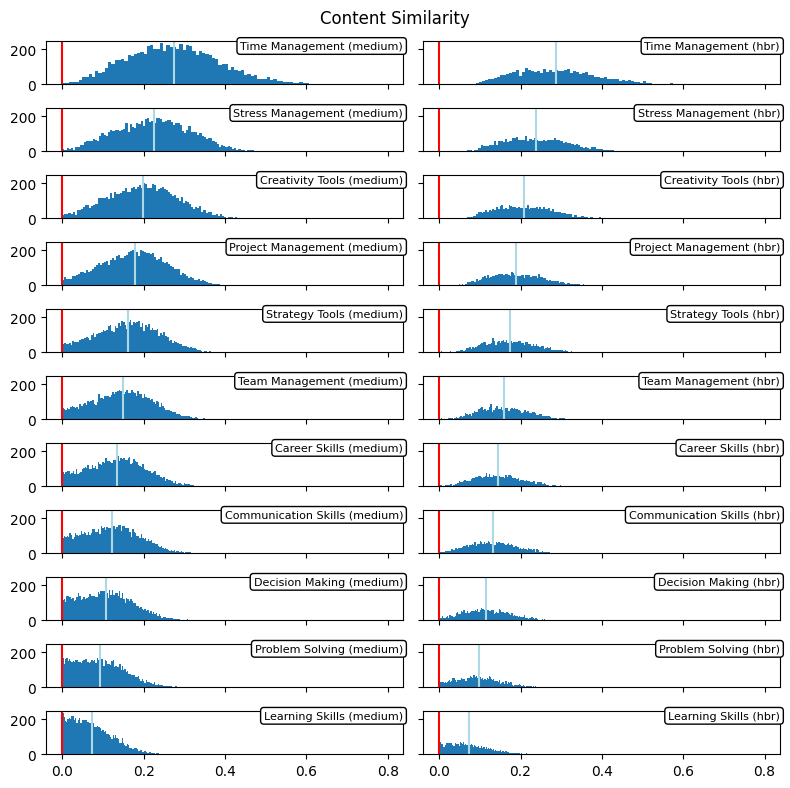

In [9]:
fig, axs = plt.subplots(len(skills_df.columns), 2, figsize=(8,8), sharex=True, sharey=True)
for i, provider in enumerate(['medium', 'hbr']):
    _df = df[lambda x: x.provider == provider].drop(columns=['provider'])
    for j, skill in enumerate(skills_df.columns):
        ax = axs[j, i]
        ax.hist(_df[skill].abs(), bins=100)
        ax.axvline(0.0, c="red")
        ax.axvline(_df[skill].abs().mean(), c="lightblue")
        ax.annotate(f"{skill} ({provider})", xy=(1, 1), xycoords='axes fraction', fontsize=8, horizontalalignment='right', verticalalignment='top', bbox=dict(boxstyle='round', fc='w'))
fig.suptitle("Content Similarity")
fig.tight_layout();

### Just for one skill

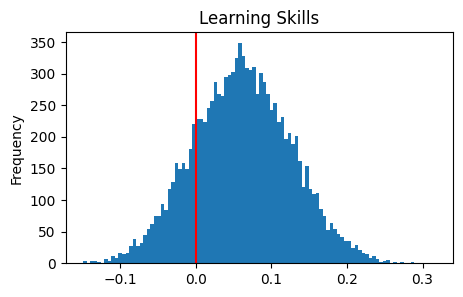

In [10]:
df['Learning Skills'].plot.hist(bins=100, figsize=(5,3), title="Learning Skills")
plt.gca().axvline(0.0, c="red");

## Ranking Analysis

In [11]:
def sort_by_skill(provider: str, skill: str, n=10, ascending=True, abs=False, titleContains=None):
    _df = df[lambda x: x.provider == provider][['title', skill]]
    if abs:
        _df[skill] = _df[skill].abs()
    _df = _df.sort_values(by=skill, ascending=ascending).reset_index(drop=True)
    if titleContains:
        _df = _df[lambda x: x.title.str.contains(titleContains, case=False)]
    return _df.head(n)

In [12]:
sort_by_skill("hbr", "Project Management", ascending=False, abs=False)

,title,Project Management
0,4 Elements of a Successful Brand Refresh,0.391977
1,The HBR Agenda 2011,0.388011
2,Saving Strategy From the Strategists,0.383449
3,"Your Agile Project Needs a Budget, Not an Esti...",0.383225
4,Cautionary Tales from Cryptoland,0.381441
5,"Do You Have a Mission Statement, or Are You on...",0.379615
6,"Why Filler Words Like ""Um"" and ""Ah"" Are Actual...",0.376297
7,"As Machines Take Jobs, Companies Need to Get C...",0.376177
8,Preferential Treatment: The New Face of Protec...,0.372190
9,How to Overcome Your Fear of the Unknown,0.371091


In [13]:
sort_by_skill("hbr", "Learning Skills", ascending=False)

,title,Learning Skills
0,"Do You Have a Mission Statement, or Are You on...",0.265861
1,The Art of Communicating Risk,0.265167
2,"How Companies, Governments, and Nonprofits Can...",0.242029
3,What Wall Street Wants to See From Twitter’s E...,0.234545
4,"Your Agile Project Needs a Budget, Not an Esti...",0.233980
5,Why You Can’t Just Tell a Company “Be More Lik...,0.230287
6,The HBR Agenda 2011,0.226415
7,A Simple Way to Test Your Company’s Strategic ...,0.223121
8,The Power of Small Wins,0.221382
9,How to Make Your Organization’s Language More ...,0.221118


In [14]:
sort_by_skill("hbr", "Learning Skills", abs=True)

,title,Learning Skills
0,Companies Need to Do More for Employees and Cu...,0.000018
1,The Cybersecurity Risks of an Escalating Russi...,0.000039
2,More-Experienced Entrepreneurs Have Bigger Dea...,0.000075
3,Knowing When to Fire Someone,0.000101
4,Private Equity’s New Phase,0.000101
5,How to Retain Your Best Sales Talent,0.000111
6,The Uber-Waymo Lawsuit: It Should Be Easy to P...,0.000121
7,When Your Efforts to Be Inclusive Misfire,0.000126
8,Why the Circular Economy is Gaining Momentum a...,0.000127
9,Managing for Organizational Integrity,0.000167


In [15]:
sort_by_skill("hbr", "Problem Solving")

,title,Problem Solving
0,What's So Special About Founders?,-0.091429
1,Learning to Learn,-0.075330
2,The Balanced Scorecard: Measures That Drive Pe...,-0.073033
3,Prepare Your Workforce for the Automation Age,-0.069870
4,Lead Your Business Through the Coronavirus Crisis,-0.055910
5,Supporting Your Team's Mental Health After a V...,-0.052479
6,"How the U.S., the EU, and Japan Are Trying to ...",-0.050361
7,Good Communication Goes Beyond Open Door Policies,-0.049753
8,“Showcase Projects” Can Deepen Your Relationsh...,-0.048735
9,Define Your Personal Brand With Simple Questions,-0.046775


### Filter by Title

In [16]:
sort_by_skill("hbr", "Learning Skills", titleContains="learning", n=50)

,title,Learning Skills
1,Learning to Learn,-0.098996
49,Insights on Adapting to a Virtual Learning Env...,-0.043239
76,Where Companies Go Wrong with Learning and Dev...,-0.032394
291,"Lifelong Learning Is Good for Your Health, You...",-0.002718
298,Manage Your Organization as a Portfolio of Lea...,-0.002298
318,What Machine Learning Will Mean for Asset Mana...,-0.000816
648,Sales Learning Curve,0.022492
805,Strategies for Learning from Failure,0.030997
913,Learning the Tricks of the Trade,0.037907
984,Learning in the Thick of It,0.041574


In [17]:
sort_by_skill("hbr", "Time Management", titleContains="time management")

,title,Time Management
276,Time Management Is About More Than Life Hacks,0.157186
2073,How to Help an Employee Who Struggles with Tim...,0.339244


In [18]:
sort_by_skill("hbr", "Project Management", titleContains="project management")

,title,Project Management
1762,Five Critical Roles in Project Management,0.205488
2003,The Four Phases of Project Management,0.221460
